In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def lin(x, a, b):
    return a*x + b

height_file = open('200_ipm_heights.pickle', 'rb')
height_data = pickle.loads(height_file.read())
velocities = [7.0, 6.5, 6.0, 5.5, 5.0, 4.5, 4.0, 3.5, 3.0]

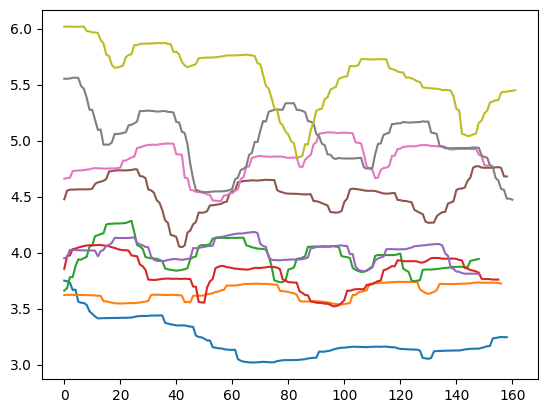

In [3]:
#trim data

upper_trim_idx = 100
lower_trim_idx = 50
heights = []
for height in height_data:
    heights.append(height[lower_trim_idx:-upper_trim_idx,1])
for height in heights:
        plt.plot(height)
plt.show()

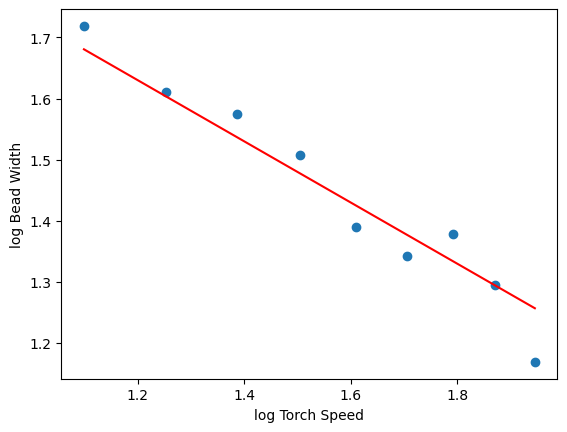

Log-Log MSE:  0.00848447450241201
Log-Log RMSE:  0.04244661019080941
popt:  [2.22990568]


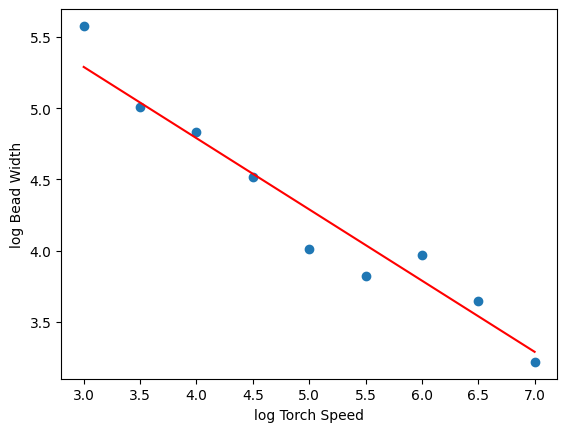

Linear MSE:  0.12750315578162427
Linear RMSE:  0.16969122711688822


In [4]:
heights_avg = []
for height in heights:
    heights_avg.append(np.average(height))

speeds_log = np.log(velocities)
heights_log = np.log(heights_avg)
popt_log, pcov = curve_fit(lin, speeds_log, heights_log)

fig,ax = plt.subplots(1,1)
ax.plot(speeds_log, lin(speeds_log, *popt_log), 'r')
ax.scatter(speeds_log,heights_log)
ax.set_xlabel("log Torch Speed")
ax.set_ylabel("log Bead Width")
plt.show()
ll_mse = np.linalg.norm((heights_log-lin(speeds_log, *popt_log))**2)
ll_rmse = np.linalg.norm(heights_log-lin(speeds_log, *popt_log))/np.sqrt(len(heights_log))
print("Log-Log MSE: ", ll_mse)
print("Log-Log RMSE: ", ll_rmse)
print("popt: ", popt_log)


popt_lin, pcov = curve_fit(lin, velocities, heights_avg)

fig,ax = plt.subplots(1,1)
ax.plot(np.array(velocities), lin(np.array(velocities), *popt_lin), 'r')
ax.scatter(velocities,heights_avg)
ax.set_xlabel("log Torch Speed")
ax.set_ylabel("log Bead Width")
plt.show()
lin_mse = np.linalg.norm((heights_avg-lin(np.array(velocities), *popt_lin))**2)
lin_rmse = np.linalg.norm(heights_avg-lin(np.array(velocities), *popt_lin))/np.sqrt(len(heights_avg))
print("Linear MSE: ", lin_mse)
print("Linear RMSE: ", lin_rmse)

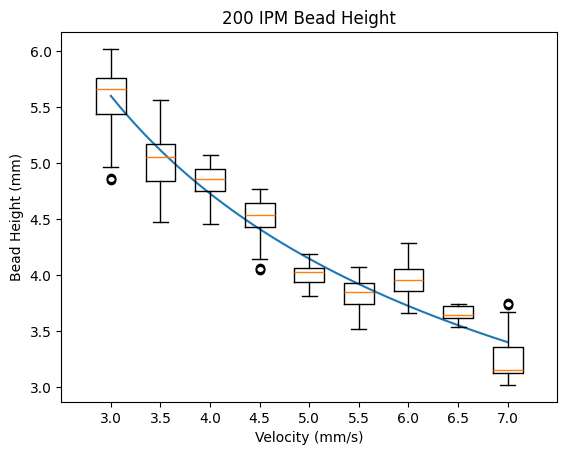

In [21]:
fig, ax = plt.subplots(1,1)
vel_ver = np.linspace(3, 7)
height_ver_log = popt[0]*np.log(vel_ver)+popt[1]
height_ver = np.exp(height_ver_log)
ax.plot(vel_ver, height_ver)
ax.boxplot(heights, positions=velocities, widths=0.3)
plt.title("200 IPM Bead Height")
plt.xlabel("Velocity (mm/s)")
plt.ylabel("Bead Height (mm)")
plt.show()